<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n20.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.470779,55.065953,98.598053,-1.148825e-07,259.134785,259.134785,3.221881e-07
1,0.0,1.0,74.520121,58.603791,25.031611,-5.757658e-09,168.155523,168.155523,-5.034622e-09
2,0.0,2.0,81.148581,89.044305,45.544871,2.293365e-08,225.737757,225.737757,-1.438956e-07
3,0.0,3.0,33.902349,98.912399,47.294812,-2.428911e-08,190.109560,190.109560,-3.651991e-07
4,0.0,4.0,43.963407,25.980018,35.325429,-7.302457e-07,115.268854,115.268854,-4.360299e-07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.363353,53.159578,52.443491,-7.876971e-08,170.966422,170.966422,-5.999556e-08
249996,999.0,246.0,22.275076,95.942900,25.866626,2.534102e-09,154.084602,154.084603,-1.787857e-07
249997,999.0,247.0,38.923135,89.373477,25.550399,2.485579e-08,163.847011,163.847011,-4.490093e-08
249998,999.0,248.0,30.976211,74.120125,70.624890,1.432002e-08,185.721226,185.721226,-1.656622e-07


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.470779,55.065953,98.598053,-1.148825e-07,259.134785,259.134785,3.221881e-07
1,0.0,1.0,74.520121,58.603791,25.031611,-5.757658e-09,168.155523,168.155523,-5.034622e-09
2,0.0,2.0,81.148581,89.044305,45.544871,2.293365e-08,225.737757,225.737757,-1.438956e-07
3,0.0,3.0,33.902349,98.912399,47.294812,-2.428911e-08,190.109560,190.109560,-3.651991e-07
4,0.0,4.0,43.963407,25.980018,35.325429,-7.302457e-07,115.268854,115.268854,-4.360299e-07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.363353,53.159578,52.443491,-7.876971e-08,170.966422,170.966422,-5.999556e-08
249996,999.0,246.0,22.275076,95.942900,25.866626,2.534102e-09,154.084602,154.084603,-1.787857e-07
249997,999.0,247.0,38.923135,89.373477,25.550399,2.485579e-08,163.847011,163.847011,-4.490093e-08
249998,999.0,248.0,30.976211,74.120125,70.624890,1.432002e-08,185.721226,185.721226,-1.656622e-07


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    95.470779  55.065953  ...  259.134785  3.221881e-07
      1.0    74.520121  58.603791  ...  168.155523 -5.034622e-09
      2.0    81.148581  89.044305  ...  225.737757 -1.438956e-07
      3.0    33.902349  98.912399  ...  190.109560 -3.651991e-07
      4.0    43.963407  25.980018  ...  115.268854 -4.360299e-07
...                ...        ...  ...         ...           ...
999.0 245.0  55.363353  53.159578  ...  170.966422 -5.999556e-08
      246.0  22.275076  95.942900  ...  154.084603 -1.787857e-07
      247.0  38.923135  89.373477  ...  163.847011 -4.490093e-08
      248.0  30.976211  74.120125  ...  185.721226 -1.656622e-07
      249.0  32.929572  62.761335  ...  188.982538 -1.443285e-07

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    95.470779  55.065953  ...  259.134785  3.221881e-07
      1.0    74.520121  58.603791  ...  168.155523 -5.034622e-09
      2.0    81.148581  89.044305  ...  225.737757 -1.438956e-07
      3.0    33.902349  98.912399  ...  190.109560 -3.651991e-07
      4.0    43.963407  25.980018  ...  115.268854 -4.360299e-07
...                ...        ...  ...         ...           ...
999.0 245.0  55.363353  53.159578  ...  170.966422 -5.999556e-08
      246.0  22.275076  95.942900  ...  154.084603 -1.787857e-07
      247.0  38.923135  89.373477  ...  163.847011 -4.490093e-08
      248.0  30.976211  74.120125  ...  185.721226 -1.656622e-07
      249.0  32.929572  62.761335  ...  188.982538 -1.443285e-07

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.470779,55.065953,98.598053,-1.148825e-07,259.134785,259.134785,3.221881e-07
1,0.0,1.0,74.520121,58.603791,25.031611,-5.757658e-09,168.155523,168.155523,-5.034622e-09
2,0.0,2.0,81.148581,89.044305,45.544871,2.293365e-08,225.737757,225.737757,-1.438956e-07
3,0.0,3.0,33.902349,98.912399,47.294812,-2.428911e-08,190.109560,190.109560,-3.651991e-07
4,0.0,4.0,43.963407,25.980018,35.325429,-7.302457e-07,115.268854,115.268854,-4.360299e-07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.363353,53.159578,52.443491,-7.876971e-08,170.966422,170.966422,-5.999556e-08
249996,999.0,246.0,22.275076,95.942900,25.866626,2.534102e-09,154.084602,154.084603,-1.787857e-07
249997,999.0,247.0,38.923135,89.373477,25.550399,2.485579e-08,163.847011,163.847011,-4.490093e-08
249998,999.0,248.0,30.976211,74.120125,70.624890,1.432002e-08,185.721226,185.721226,-1.656622e-07


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    95.470779  55.065953  ...  259.134785  3.221881e-07
      1.0    74.520121  58.603791  ...  168.155523 -5.034622e-09
      2.0    81.148581  89.044305  ...  225.737757 -1.438956e-07
      3.0    33.902349  98.912399  ...  190.109560 -3.651991e-07
      4.0    43.963407  25.980018  ...  115.268854 -4.360299e-07
...                ...        ...  ...         ...           ...
999.0 245.0  55.363353  53.159578  ...  170.966422 -5.999556e-08
      246.0  22.275076  95.942900  ...  154.084603 -1.787857e-07
      247.0  38.923135  89.373477  ...  163.847011 -4.490093e-08
      248.0  30.976211  74.120125  ...  185.721226 -1.656622e-07
      249.0  32.929572  62.761335  ...  188.982538 -1.443285e-07

[250000 rows x 7 columns]

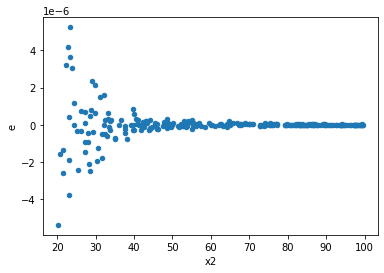

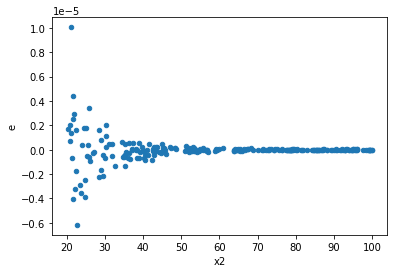

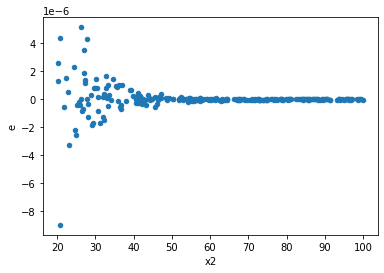

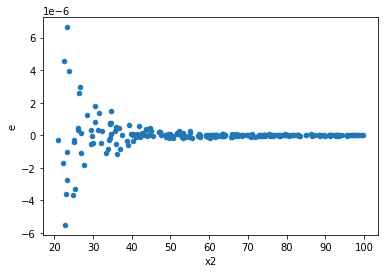

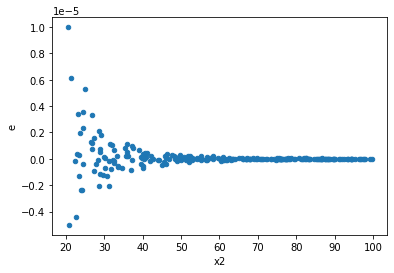

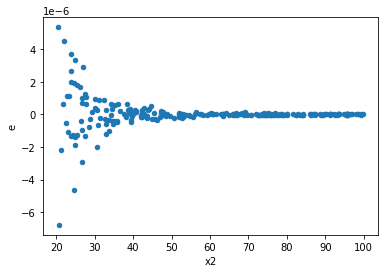

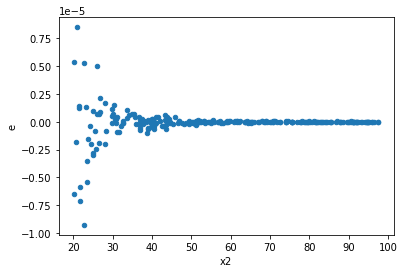

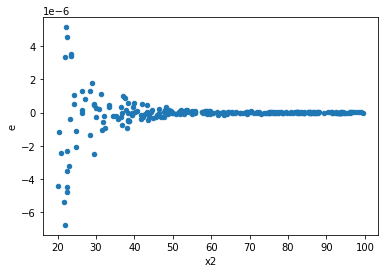

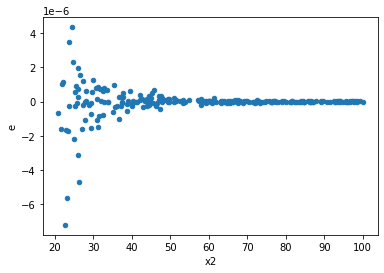

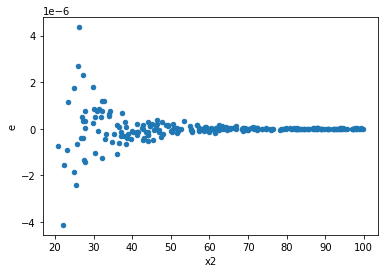

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,3.986836180361023e-14,4.722995970838513e-10,4.152954354542732e-16,4.9197874696234506e-12,8.441328777278644e-05,3.4259812983159444e-170,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,6.956849682422908e-14,2.254059952493903e-10,7.246718419190529e-16,2.347979117181149e-12,0.00030863640848265,6.804472212284303e-143,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,4.2887549229271467e-14,1.2571473675478922e-10,4.467453044715777e-16,1.3095285078623878e-12,0.00034114973579370457,8.731727943890698e-141,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,4.025287544704144e-14,2.4645958972978137e-10,4.1930078590668166e-16,2.567287393018556e-12,0.00016332444394302024,2.713853298524514e-156,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,4.9893021345042315e-14,3.01361392606523e-10,5.197189723441908e-16,3.1391811729846147e-12,0.0001655587695341781,5.244362983976719e-156,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,4.121938098958184e-14,2.2203521863838388e-10,4.2936855197481085e-16,2.3128668608164987e-12,0.00018564343639877016,1.350962273038561e-153,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,4.677125942659603e-14,2.2967419330904905e-10,4.872006190270419e-16,2.3924395136359278e-12,0.00020364177077422332,1.1994519983320173e-151,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,6.04057737347983e-14,9.593907588015011e-11,6.292268097374823e-16,9.993653737515637e-13,0.0006296263871694882,6.868885962763265e-128,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,4.389893889341607e-14,2.9541373004671103e-10,4.572806134730841e-16,3.07722635465324e-12,0.00014860155242775867,2.7819136151062006e-158,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64